## Dataimport, cleaning and overview

### Import and overview

In [2]:
!pip install -r requirements.txt

In [3]:
try:
    import nltk
    nltk.download('stopwords', quiet=True)
except ImportError:
    !pip install nltk
    import nltk
    nltk.download('stopwords', quiet=True)

In [4]:

# Datahandling

!pip install wordcloud

import requests
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
import plotly.express as px





In [5]:
# Data import: 
data = pd.read_csv('TwitterData_Joined.csv')

In [6]:
data.head()

,Twitter_User_Name,Twitter_Account,Twitter_User_Description,Tweet_id,Tweet_created_at,Tweet_text,Label,Word_Count,Url_Count,Retweet,...,Adverb_Count,Positive_Word_Ratio,Negative_Word_Ratio,Neutral_Word_Ratio,Following,Followers,Verified,Link,Location,Real_Location
0,Museum Bot,MuseumBot,I am a bot that tweets a random high-res Open ...,8.027580e+17,27-11-2016 06:15,Imperial Theatrical Coat for Court Lady https:...,0,8,2,0,...,0,0.000,0.0,1.000,0,7816,0,https://twitter.com/MuseumBot?s=20,NaN,-1.0
1,Museum Bot,MuseumBot,I am a bot that tweets a random high-res Open ...,8.746920e+17,13-06-2017 18:15,Half-length Figure of St Paul in an Oval. http...,0,10,2,0,...,0,0.000,0.0,1.000,0,7816,0,https://twitter.com/MuseumBot?s=20,NaN,-1.0
2,Museum Bot,MuseumBot,I am a bot that tweets a random high-res Open ...,6.983900e+17,13-02-2016 06:15,Great Exhibition Jurors&amp;#39; Medal https:/...,0,6,2,0,...,0,0.125,0.0,0.875,0,7816,0,https://twitter.com/MuseumBot?s=20,NaN,-1.0
3,Museum Bot,MuseumBot,I am a bot that tweets a random high-res Open ...,6.976650e+17,11-02-2016 06:15,Pair of candelabra https://t.co/KYopSWDSw2 htt...,0,5,2,0,...,0,0.000,0.0,1.000,0,7816,0,https://twitter.com/MuseumBot?s=20,NaN,-1.0
4,Museum Bot,MuseumBot,I am a bot that tweets a random high-res Open ...,6.217450e+17,16-07-2015 18:15,Banner (Nobori)\n http://t.co/yz34Xgo9a5 http:...,0,4,2,0,...,0,0.000,0.0,1.000,0,7816,0,https://twitter.com/MuseumBot?s=20,NaN,-1.0


In [7]:
data.shape

(279691, 29)

In [8]:
data.columns

Index(['Twitter_User_Name', 'Twitter_Account', 'Twitter_User_Description',
       'Tweet_id', 'Tweet_created_at', 'Tweet_text', 'Label', 'Word_Count',
       'Url_Count', 'Retweet', 'Original_User', 'Mentions_Count',
       'Hashtags_Count', 'QuesMark_Count', 'Exclamations_Count',
       'SpecialCharacters_Count', 'Nouns_Count', 'Pronouns_Count',
       'Verb_Count', 'Adverb_Count', 'Positive_Word_Ratio',
       'Negative_Word_Ratio', 'Neutral_Word_Ratio', 'Following', 'Followers',
       'Verified', 'Link', 'Location', 'Real_Location'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279691 entries, 0 to 279690
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Twitter_User_Name         279691 non-null  object 
 1   Twitter_Account           279691 non-null  object 
 2   Twitter_User_Description  276027 non-null  object 
 3   Tweet_id                  279691 non-null  float64
 4   Tweet_created_at          279691 non-null  object 
 5   Tweet_text                279691 non-null  object 
 6   Label                     279691 non-null  int64  
 7   Word_Count                279691 non-null  int64  
 8   Url_Count                 279691 non-null  int64  
 9   Retweet                   279691 non-null  int64  
 10  Original_User             58391 non-null   object 
 11  Mentions_Count            279691 non-null  int64  
 12  Hashtags_Count            279691 non-null  int64  
 13  QuesMark_Count            279691 non-null  i

In [10]:
data.isna().sum()


Twitter_User_Name                0
Twitter_Account                  0
Twitter_User_Description      3664
Tweet_id                         0
Tweet_created_at                 0
Tweet_text                       0
Label                            0
Word_Count                       0
Url_Count                        0
Retweet                          0
Original_User               221300
Mentions_Count                   0
Hashtags_Count                   0
QuesMark_Count                   0
Exclamations_Count               0
SpecialCharacters_Count          0
Nouns_Count                      0
Pronouns_Count                   0
Verb_Count                       0
Adverb_Count                     0
Positive_Word_Ratio              0
Negative_Word_Ratio              0
Neutral_Word_Ratio               0
Following                        0
Followers                        0
Verified                         0
Link                         14566
Location                    110994
Real_Location       

### Cleaning and basic despricptive analysis

In [11]:
import pandas as pd

# Assuming 'data' is your DataFrame

# Fill missing values with 0 for specific columns
columns_to_fill = ['Twitter_User_Description', 'Link', 'Location', 'Original_User']

data[columns_to_fill] = data[columns_to_fill].fillna(0)

# If you want to fill all columns with NaNs with 0, you can do:
# data.fillna(0, inplace=True)

# Display the DataFrame to verify changes


In [12]:
data.isna().sum()


Twitter_User_Name           0
Twitter_Account             0
Twitter_User_Description    0
Tweet_id                    0
Tweet_created_at            0
Tweet_text                  0
Label                       0
Word_Count                  0
Url_Count                   0
Retweet                     0
Original_User               0
Mentions_Count              0
Hashtags_Count              0
QuesMark_Count              0
Exclamations_Count          0
SpecialCharacters_Count     0
Nouns_Count                 0
Pronouns_Count              0
Verb_Count                  0
Adverb_Count                0
Positive_Word_Ratio         0
Negative_Word_Ratio         0
Neutral_Word_Ratio          0
Following                   0
Followers                   0
Verified                    0
Link                        0
Location                    0
Real_Location               0
dtype: int64

In [14]:
data.columns

Index(['Twitter_User_Name', 'Twitter_Account', 'Twitter_User_Description',
       'Tweet_id', 'Tweet_created_at', 'Tweet_text', 'Label', 'Word_Count',
       'Url_Count', 'Retweet', 'Original_User', 'Mentions_Count',
       'Hashtags_Count', 'QuesMark_Count', 'Exclamations_Count',
       'SpecialCharacters_Count', 'Nouns_Count', 'Pronouns_Count',
       'Verb_Count', 'Adverb_Count', 'Positive_Word_Ratio',
       'Negative_Word_Ratio', 'Neutral_Word_Ratio', 'Following', 'Followers',
       'Verified', 'Link', 'Location', 'Real_Location'],
      dtype='object')

In [15]:
# Method 1: Using dtype
quantitative_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Format the describe output to show regular numbers
desc_stats = data[quantitative_columns].describe()
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print("\nDescriptive Statistics:")
print(desc_stats)


Descriptive Statistics:
                    Tweet_id     Label  Word_Count  Url_Count   Retweet  \
count              279691.00 279691.00   279691.00  279691.00 279691.00   
mean   790870432473705216.00      0.52       12.96       0.49      0.21   
std    275015878617909440.00      0.50        7.16       0.56      0.41   
min           12796523176.00      0.00        1.00       0.00      0.00   
25%    619934000000000000.00      0.00        7.00       0.00      0.00   
50%    887113000000000000.00      1.00       13.00       0.00      0.00   
75%   1023220000000000000.00      1.00       19.00       1.00      0.00   
max   1072710000000000000.00      1.00       62.00       4.00      1.00   

       Mentions_Count  Hashtags_Count  QuesMark_Count  Exclamations_Count  \
count       279691.00       279691.00       279691.00           279691.00   
mean             0.50            0.25            0.10                0.23   
std              0.96            0.73            0.40               

In [16]:
# 1. Handle negative values in Followers and Following
data['Followers'] = data['Followers'].clip(lower=0)  # Replace negatives with 0
data['Following'] = data['Following'].clip(lower=0)  # Replace negatives with 0

# 2. Handle extreme outliers (optional, depending on your analysis needs)
def remove_extreme_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR  # Using 3 instead of 1.5 to be more conservative
    upper_bound = Q3 + 3 * IQR
    return df[column].clip(lower=lower_bound, upper=upper_bound)

# Apply to columns with extreme values
data['Followers'] = remove_extreme_outliers(data, 'Followers')
data['Following'] = remove_extreme_outliers(data, 'Following')
data['SpecialCharacters_Count'] = remove_extreme_outliers(data, 'SpecialCharacters_Count')

# 3. Check the cleaned data
cleaned_stats = data[quantitative_columns].describe()
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print("\nCleaned Descriptive Statistics:")
print(cleaned_stats)


Cleaned Descriptive Statistics:
                    Tweet_id     Label  Word_Count  Url_Count   Retweet  \
count              279691.00 279691.00   279691.00  279691.00 279691.00   
mean   790870432473705216.00      0.52       12.96       0.49      0.21   
std    275015878617909440.00      0.50        7.16       0.56      0.41   
min           12796523176.00      0.00        1.00       0.00      0.00   
25%    619934000000000000.00      0.00        7.00       0.00      0.00   
50%    887113000000000000.00      1.00       13.00       0.00      0.00   
75%   1023220000000000000.00      1.00       19.00       1.00      0.00   
max   1072710000000000000.00      1.00       62.00       4.00      1.00   

       Mentions_Count  Hashtags_Count  QuesMark_Count  Exclamations_Count  \
count       279691.00       279691.00       279691.00           279691.00   
mean             0.50            0.25            0.10                0.23   
std              0.96            0.73            0.40       

## Dataviz/EDA 
Superficial Analysis and Bot Vs. Human Profile behaviour.
Lets check out if there is difference between bots and non bots with EDA and vizualizations!

### Qualitative

In [30]:
import nltk
nltk.download('stopwords', quiet=True)
from collections import Counter
import plotly.express as px
from nltk.corpus import stopwords
import re
import pandas as pd


# Set up stop words
stop_words = set(stopwords.words('english'))


# Function to preprocess and count words
def analyze_word_frequency(tweets):
    # Join all tweets, convert to lowercase
    words = ' '.join(tweets.dropna()).lower()
    
    # Remove URLs completely
    words = re.sub(r'https?://\S+', '', words)
    
    # Extract words using regex
    words = re.findall(r'\b\w+\b', words)
    
    # Remove stop words, short words, and specific unwanted words
    words = [
        word for word in words 
        if word not in stop_words 
        and len(word) > 3 
        and word not in ['http', 'https']
    ]
    
    # Count word frequencies
    word_freq = Counter(words).most_common(20)
    
    return pd.DataFrame(word_freq, columns=['Word', 'Count'])


# Separate bots and non-bots
bot_tweets = data[data['Label'] == 0]['Tweet_text']
non_bot_tweets = data[data['Label'] == 1]['Tweet_text']


# Analyze word frequencies
bot_word_freq_df = analyze_word_frequency(bot_tweets)
non_bot_word_freq_df = analyze_word_frequency(non_bot_tweets)


# Create interactive plots for bots
bot_fig = px.bar(
    bot_word_freq_df,
    x='Count',
    y='Word',
    orientation='h',
    title="Top 20 Words in Bot Tweets",
    color='Count',
    color_continuous_scale='Plasma'
)
bot_fig.update_layout(yaxis=dict(autorange="reversed"))


# Create interactive plots for non-bots
non_bot_fig = px.bar(
    non_bot_word_freq_df,
    x='Count',
    y='Word',
    orientation='h',
    title="Top 20 Words in Non-Bot Tweets",
    color='Count',
    color_continuous_scale='Viridis'
)
non_bot_fig.update_layout(yaxis=dict(autorange="reversed"))


# Display both plots
bot_fig.show()
non_bot_fig.show()


# Optional: Print out the word frequency DataFrames
print("Bot Word Frequencies:")
print(bot_word_freq_df)


print("\nNon-Bot Word Frequencies:")
print(non_bot_word_freq_df)


# Compare word frequencies
merged_freq_df = pd.merge(
    bot_word_freq_df, 
    non_bot_word_freq_df, 
    on='Word', 
    how='outer', 
    suffixes=('_Bot', '_NonBot')
).fillna(0)


# Sort by total frequency
merged_freq_df['Total'] = merged_freq_df['Count_Bot'] + merged_freq_df['Count_NonBot']
merged_freq_df = merged_freq_df.sort_values('Total', ascending=False).head(20)


print("\nComparative Word Frequencies:")
print(merged_freq_df)

Bot Word Frequencies:
          Word  Count
0         bong  21032
1         nthe   6775
2         back   4046
3       please   4029
4         work   3879
5         nand   3781
6        eaten   3387
7         like   3364
8    available   3359
9     probably   3344
10        nyou   3321
11      planet   3308
12       nthat   3280
13     netflix   3275
14        nfor   3261
15     instant   3251
16    allsorts   3224
17       robot   2978
18  discovered   2960
19       nthey   2846

Non-Bot Word Frequencies:
          Word  Count
0         x99s   6580
1     business   5919
2        small   5733
3       thanks   5387
4         like   4458
5        today   3911
6         look   3731
7         need   3562
8         good   3507
9       people   3436
10        time   3331
11        x99t   3267
12        love   3095
13  everything   3062
14      taking   2954
15        know   2843
16        best   2718
17        boss   2644
18        site   2643
19       thank   2615

Comparative Word Frequenci

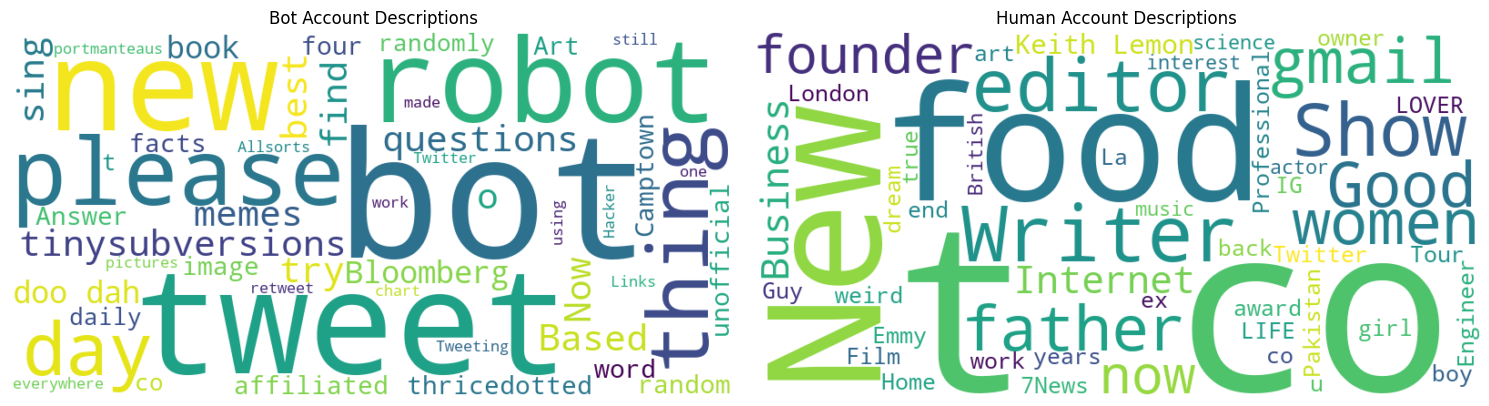

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
# Ensure DataFrame is created correctly
df = pd.DataFrame(data)  # Assuming 'data' is your DataFrame
# Convert descriptions to string
df['Twitter_User_Description'] = df['Twitter_User_Description'].astype(str)
# Group descriptions by account and keep only unique ones
unique_descriptions = df.groupby('Twitter_User_Name')['Twitter_User_Description'].unique().apply(lambda x: ' '.join(x))
# Separate bot and human accounts
bot_accounts = df[df['Label'] == 0]['Twitter_User_Name']
human_accounts = df[df['Label'] == 1]['Twitter_User_Name']
# Get descriptions for bot and human accounts
bot_descriptions = unique_descriptions[bot_accounts].drop_duplicates()
human_descriptions = unique_descriptions[human_accounts].drop_duplicates()
# Convert descriptions to text for word cloud generation
bot_text = " ".join(bot_descriptions)
human_text = " ".join(human_descriptions)
# Create custom stopwords (optional)
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['https', 'http', 'www', 'com'])
# Generate word clouds
bot_wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    stopwords=custom_stopwords, 
    max_words=50
).generate(bot_text)
human_wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    stopwords=custom_stopwords, 
    max_words=50
).generate(human_text)
# Plot word clouds
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(bot_wordcloud, interpolation='bilinear')
plt.title('Bot Account Descriptions')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(human_wordcloud, interpolation='bilinear')
plt.title('Human Account Descriptions')
plt.axis('off')
plt.tight_layout()
plt.show()

/var/folders/xc/v1l81vkx6fjc9wpqc0tsnl400000gn/T/ipykernel_3030/286192690.py:7: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



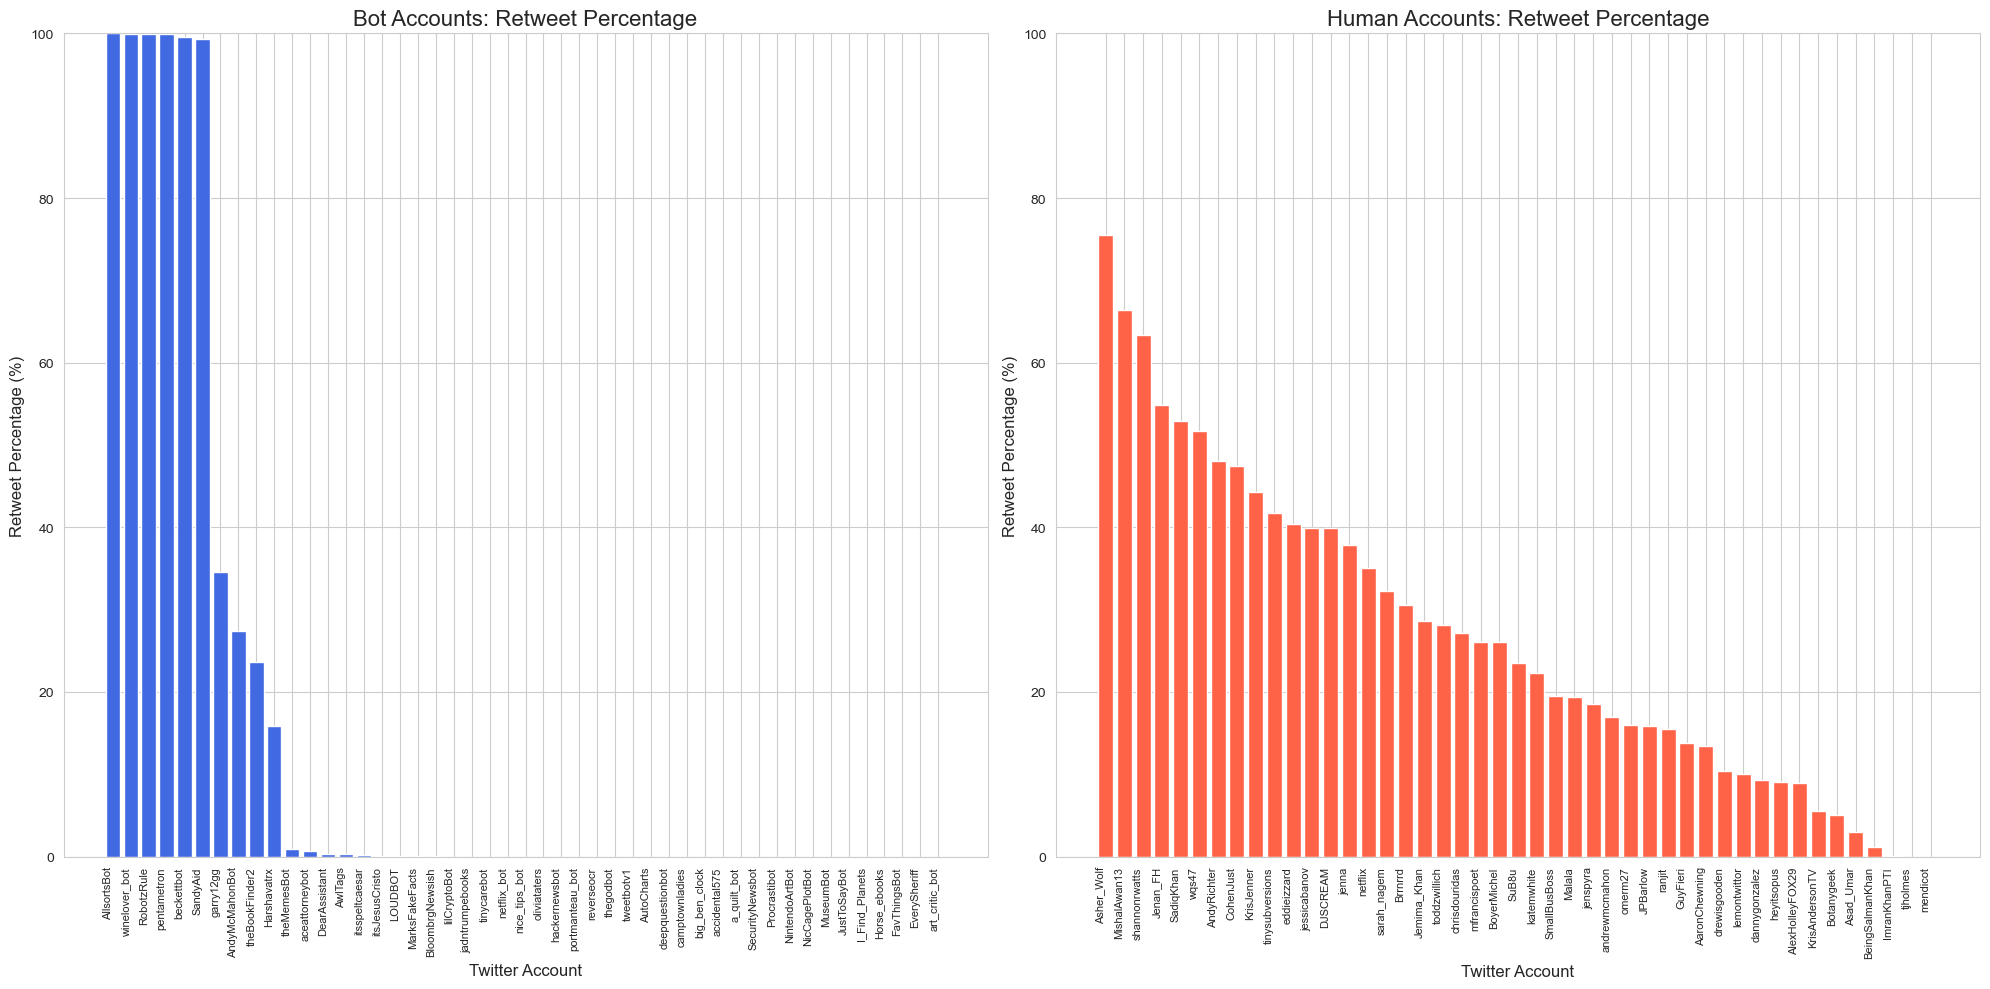

Average Bot Retweet Percentage: 14.95%
Average Human Retweet Percentage: 26.57%

Bot Retweet Percentage Summary:
count    47.00
mean     14.95
std      33.62
min       0.00
25%       0.00
50%       0.00
75%       0.54
max     100.00
Name: Retweet_Percentage, dtype: float64

Human Retweet Percentage Summary:
count   45.00
mean    26.57
std     19.28
min      0.00
25%     10.44
50%     23.48
75%     39.97
max     75.51
Name: Retweet_Percentage, dtype: float64


In [ ]:
# Calculate retweet percentage per account
def calculate_retweet_percentage(group):
    total_tweets = len(group)
    retweet_count = (group['Retweet'] == 1).sum()
    return (retweet_count / total_tweets) * 100 if total_tweets > 0 else 0
# Group by account and label, calculate retweet percentage
retweet_percentages = data.groupby(['Twitter_Account', 'Label']).apply(calculate_retweet_percentage).reset_index()
retweet_percentages.columns = ['Twitter_Account', 'Label', 'Retweet_Percentage']
# Separate bot and human data
bot_data = retweet_percentages[retweet_percentages['Label'] == 0]
human_data = retweet_percentages[retweet_percentages['Label'] == 1]
# Sort data by retweet percentage in descending order
bot_data = bot_data.sort_values('Retweet_Percentage', ascending=False)
human_data = human_data.sort_values('Retweet_Percentage', ascending=False)
# Plotting
plt.figure(figsize=(20, 10))
# Bot subplot
plt.subplot(1, 2, 1)
plt.bar(bot_data['Twitter_Account'], bot_data['Retweet_Percentage'], color='royalblue')
plt.title('Bot Accounts: Retweet Percentage', fontsize=16)
plt.xlabel('Twitter Account', fontsize=12)
plt.ylabel('Retweet Percentage (%)', fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.ylim(0, 100)
# Human subplot
plt.subplot(1, 2, 2)
plt.bar(human_data['Twitter_Account'], human_data['Retweet_Percentage'], color='tomato')
plt.title('Human Accounts: Retweet Percentage', fontsize=16)
plt.xlabel('Twitter Account', fontsize=12)
plt.ylabel('Retweet Percentage (%)', fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()
# Calculate and print averages
print(f"Average Bot Retweet Percentage: {bot_data['Retweet_Percentage'].mean():.2f}%")
print(f"Average Human Retweet Percentage: {human_data['Retweet_Percentage'].mean():.2f}%")
# Optional: Statistical summary
print("\nBot Retweet Percentage Summary:")
print(bot_data['Retweet_Percentage'].describe())
print("\nHuman Retweet Percentage Summary:")
print(human_data['Retweet_Percentage'].describe())

<Figure size 1500x800 with 0 Axes>

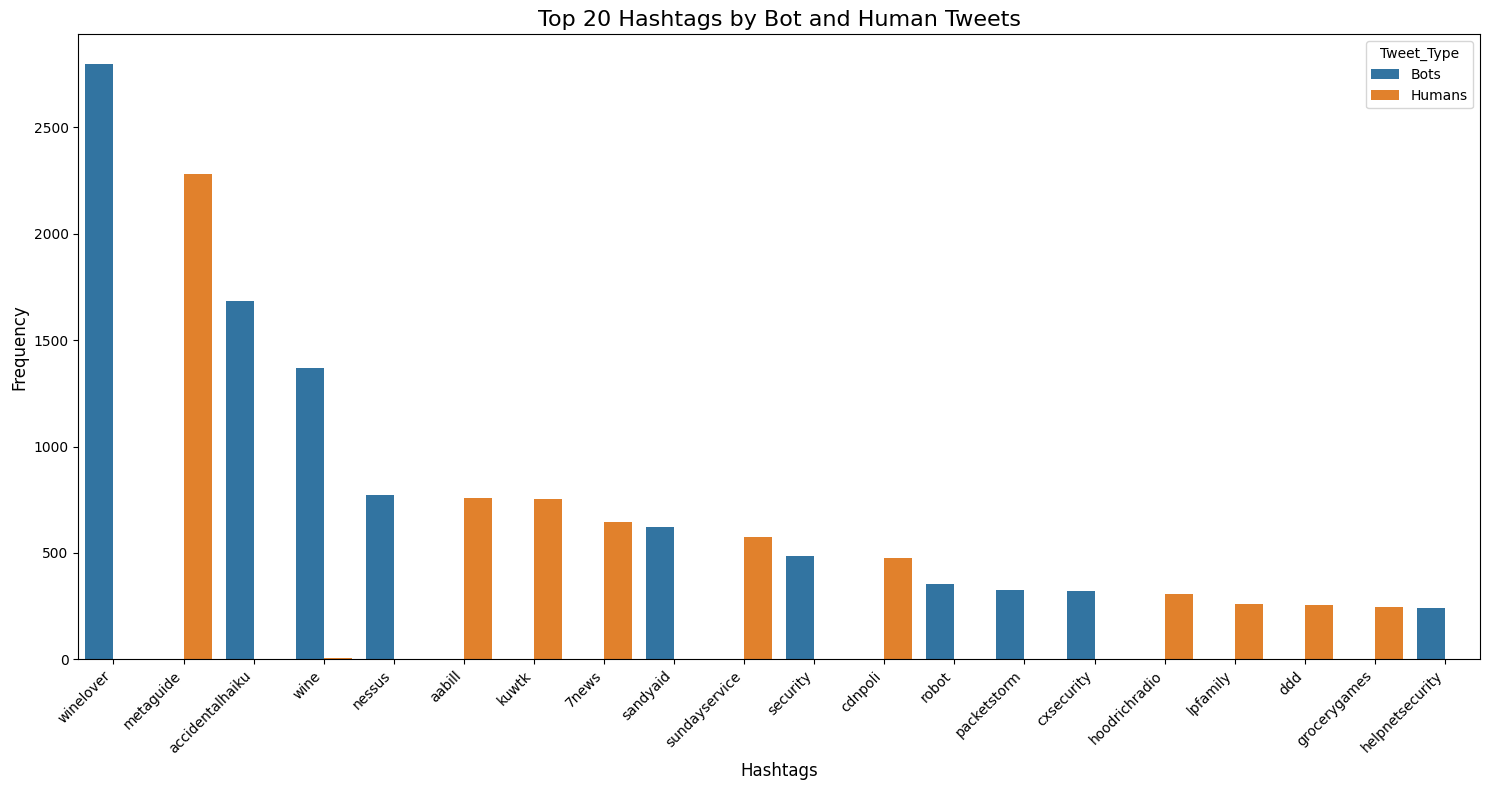

Top 20 Hashtags Analysis:
                   Bots  Humans   Total  Bot_Percentage  Human_Percentage
Hashtags                                                                 
winelover       2797.00    0.00 2797.00          100.00              0.00
metaguide          0.00 2281.00 2281.00            0.00            100.00
accidentalhaiku 1684.00    0.00 1684.00          100.00              0.00
wine            1367.00    5.00 1372.00           99.64              0.36
nessus           770.00    0.00  770.00          100.00              0.00
aabill             0.00  760.00  760.00            0.00            100.00
kuwtk              0.00  755.00  755.00            0.00            100.00
7news              0.00  647.00  647.00            0.00            100.00
sandyaid         623.00    0.00  623.00          100.00              0.00
sundayservice      0.00  575.00  575.00            0.00            100.00
security         485.00    3.00  488.00           99.39              0.61
cdnpoli     

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from scipy.stats import chi2_contingency


def clean_and_extract_hashtags(tweet_text):
    # Handle potential NaN values
    if pd.isna(tweet_text):
        return []
    
    # Use regex to extract clean hashtags
    hashtags = re.findall(r'#(\w+)', str(tweet_text).lower())
    return hashtags


# Extract hashtags
data['Hashtags'] = data['Tweet_text'].apply(clean_and_extract_hashtags)


# Separate hashtags for bots and humans
bot_hashtags = data[data['Label'] == 0]['Hashtags'].explode()
human_hashtags = data[data['Label'] == 1]['Hashtags'].explode()


# Count hashtag frequencies
bot_hashtag_counts = bot_hashtags.value_counts()
human_hashtag_counts = human_hashtags.value_counts()


# Create a combined dataframe of hashtag counts
hashtag_df = pd.DataFrame({
    'Bots': bot_hashtag_counts,
    'Humans': human_hashtag_counts
}).fillna(0)


# Calculate total and sort
hashtag_df['Total'] = hashtag_df['Bots'] + hashtag_df['Humans']
top_hashtags = hashtag_df.nlargest(20, 'Total')


# Visualization
plt.figure(figsize=(15, 8))


# Create a side-by-side bar plot
top_hashtags_reset = top_hashtags.reset_index()
top_hashtags_reset.columns = ['Hashtag', 'Bots', 'Humans', 'Total']


# Melt the dataframe for easier plotting
melted_df = pd.melt(top_hashtags_reset, 
                    id_vars=['Hashtag'], 
                    value_vars=['Bots', 'Humans'], 
                    var_name='Tweet_Type', 
                    value_name='Count')


# Use seaborn for more aesthetic plot
plt.figure(figsize=(15, 8))
sns.barplot(x='Hashtag', y='Count', hue='Tweet_Type', data=melted_df)
plt.title('Top 20 Hashtags by Bot and Human Tweets', fontsize=16)
plt.xlabel('Hashtags', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Detailed analysis
top_hashtags['Bot_Percentage'] = (top_hashtags['Bots'] / top_hashtags['Total'] * 100).round(2)
top_hashtags['Human_Percentage'] = (top_hashtags['Humans'] / top_hashtags['Total'] * 100).round(2)


# Print detailed information
print("Top 20 Hashtags Analysis:")
print(top_hashtags)


# Chi-square test
try:
    contingency_table = top_hashtags[['Bots', 'Humans']].values
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    print("\nChi-Square Test Results:")
    print(f"Chi-Square Statistic: {chi2:.4f}")
    print(f"P-Value: {p_value:.4f}")
except Exception as e:
    print("Error in chi-square test:", str(e))

In [ ]:
from textblob import TextBlob
import pandas as pd
import plotly.express as px
import plotly.subplots as sp

# Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(str(text))  # Convert to string to handle non-string inputs
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to your data
data['Sentiment'] = data['Tweet_text'].apply(get_sentiment)

# Split data into bot and human tweets
bot_tweets = data[data['Label'] == 0]
human_tweets = data[data['Label'] == 1]

# Calculate sentiment distribution
bot_sentiment_distribution = bot_tweets.groupby(['Twitter_User_Name', 'Sentiment']).size().unstack().fillna(0)
human_sentiment_distribution = human_tweets.groupby(['Twitter_User_Name', 'Sentiment']).size().unstack().fillna(0)

# Reset index for plotting
bot_sentiment_distribution.reset_index(inplace=True)
human_sentiment_distribution.reset_index(inplace=True)

# Create subplots
fig = sp.make_subplots(rows=2, cols=1, 
                      shared_xaxes=False, 
                      vertical_spacing=0.2, 
                      subplot_titles=('Bot Tweets', 'Human Tweets'))

# Bot tweets plot
bot_fig = px.bar(
    bot_sentiment_distribution,
    x='Twitter_User_Name',
    y=['positive', 'neutral', 'negative'],
    color_discrete_map={'positive': '#00ff00', 'neutral': '#888888', 'negative': '#ff0000'},
    barmode='group',
    labels={'Twitter_User_Name': 'Twitter User', 'value': 'Tweet Count'},
    height=400
)
for data in bot_fig.data:
    fig.add_trace(data, row=1, col=1)

# Human tweets plot
human_fig = px.bar(
    human_sentiment_distribution,
    x='Twitter_User_Name',
    y=['positive', 'neutral', 'negative'],
    color_discrete_map={'positive': '#00ff00', 'neutral': '#888888', 'negative': '#ff0000'},
    barmode='group',
    labels={'Twitter_User_Name': 'Twitter User', 'value': 'Tweet Count'},
    height=400
)
for data in human_fig.data:
    fig.add_trace(data, row=2, col=1)

# Update layout
fig.update_layout(
    title='Sentiment Distribution for Bot and Human Tweets',
    height=1500,
    showlegend=True
)

# Display the plot
fig.show()